In [1]:
from pyspark.sql import SparkSession
sparkSession = SparkSession.builder.appName("example-pyspark-read-and-write").getOrCreate()

from pyspark.sql import SQLContext
sqlContext = SQLContext(sparkSession)

In [31]:
# Read from HDFS
program = sqlContext.read.parquet('hdfs://172.18.0.2:8020/Project/Data/Program/program.parquet')
program.registerTempTable("program_table");

join_program_watch  = sqlContext.read.parquet('./part-r-00000-9bf5c94a-71bb-4880-b3aa-7de8323709ba.gz.parquet')
join_program_watch.registerTempTable("JOIN_TABLE");


In [32]:
#campaign_program = sqlContext.read.parquet('hdfs://172.18.0.2:8020/Project/Data/Campaign_Program/part-00000-3324c013-01e7-4da5-95cc-d16366fcfcdf-c000.snappy.parquet')
#campaign_program.registerTempTable("campaign_program_table");

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Program & Campaign_Program Analysis :

In [38]:
sqlContext.sql("""select * from JOIN_TABLE order by NO_WATCHERS desc""").toPandas()

,PROGRAM_ID,PARENT_PROGRAM_ID,MASTER_TITLE,CATEGORY_ID,SUBCATEGORY_ID,RELEASE_YEAR,SERIES_MASTER_YN,RUNTIME,EVENT_DATE,EPISODE_NUMBER,EPISODE_TITLE,ORIGINAL_ADT,NO_OF_SURF_VIEWERS,NO_OF_FULL_SHOW_VIEWERS,NO_WATCHERS,AVG_SURF_TIME,MIN_EVENT_DATE,MAX_EVENT_DATE,AVG_DURATION_HRS
0,14419799,10691799,Super Bowl LII,2,22,2018,N,16200,2018-10-06 08:00:00.000,02042018,Philadelphia Eagles vs. New England Patriots,2018-02-04 00:00:00.000,312805,918,102505,73.062676,20180204,20180909,0.743098
1,16353667,5601454,America's Got Talent,5,44,2018,N,7200,2018-05-29 20:00:00.000,1301,Auditions 1,2018-05-29 00:00:00.000,79102,15265,34461,121.809020,20180529,20180710,0.620164
2,16152854,7012984,Fixer Upper,8,28,2018,N,3600,2018-02-27 21:00:00.000,515,All-American Farmhouse,2018-02-27 00:00:00.000,66957,24565,33077,13091.469064,20180227,20181227,0.763850
3,14962907,7012984,Fixer Upper,8,28,2018,N,3600,2018-01-23 21:00:00.000,505,A Modern Cabin Makeover,2018-01-23 00:00:00.000,65539,22182,32689,13268.674231,20180123,20181222,0.703328
4,15903381,7012984,Fixer Upper,8,28,2018,N,3600,2018-02-06 21:00:00.000,507,Big Budget for a Big House,2018-02-06 00:00:00.000,66960,23580,32087,13363.098349,20180206,20181229,0.740274
5,16485729,7012984,Fixer Upper,8,28,2018,N,3600,2018-03-20 21:00:00.000,510,From City Life in Pakistan to a Farmhouse in Waco,2018-03-20 00:00:00.000,61169,23025,30913,28754.776645,20180320,20181231,0.776993
6,14764099,7012984,Fixer Upper,8,28,2018,N,3600,2018-01-02 21:00:00.000,509,Flip House to Family Project,2018-01-02 00:00:00.000,61043,21349,30681,95.045066,20180106,20181222,0.740368
7,16105604,7012984,Fixer Upper,8,28,2018,N,3600,2018-02-20 21:00:00.000,512,A European Cottage-Style Dream Home With a View,2018-02-20 00:00:00.000,63458,22001,30444,95.810364,20180220,20181218,0.731291
8,14972783,7012984,Fixer Upper,8,28,2018,N,3600,2018-01-30 21:00:00.000,HFXUPSP06BZH,Touchdown for a Family in Need,2018-01-30 00:00:00.000,50698,19026,27592,99.461153,20180130,20181231,0.776577
9,16303576,6657611,NCAA Basketball Tournament,2,7,2018,N,0,2018-04-02 21:00:00.000,04022018,Villanova vs. Michigan,2018-04-02 00:00:00.000,79376,80746,26653,63.171600,20180402,20180430,0.537041


In [40]:
sqlContext.sql("""select * from JOIN_TABLE where PARENT_PROGRAM_ID ='5601454' order by NO_WATCHERS desc""").toPandas()

,PROGRAM_ID,PARENT_PROGRAM_ID,MASTER_TITLE,CATEGORY_ID,SUBCATEGORY_ID,RELEASE_YEAR,SERIES_MASTER_YN,RUNTIME,EVENT_DATE,EPISODE_NUMBER,EPISODE_TITLE,ORIGINAL_ADT,NO_OF_SURF_VIEWERS,NO_OF_FULL_SHOW_VIEWERS,NO_WATCHERS,AVG_SURF_TIME,MIN_EVENT_DATE,MAX_EVENT_DATE,AVG_DURATION_HRS
0,16353667,5601454,America's Got Talent,5,44,2018,N,7200,2018-05-29 20:00:00.000,1301,Auditions 1,2018-05-29 00:00:00.000,79102,15265,34461,121.80902,20180529,20180710,0.620164


In [35]:
sqlContext.sql("""select PARENT_PROGRAM_ID,count(distinct PROGRAM_ID) from JOIN_TABLE group by PARENT_PROGRAM_ID order by 2 desc """).toPandas()

,PARENT_PROGRAM_ID,count(DISTINCT PROGRAM_ID)
0,1055967,170
1,118,58
2,5121861,53
3,4227396,46
4,8831869,37
5,4135805,37
6,4350421,32
7,8167185,32
8,2718464,32
9,11198139,31


In [42]:
sqlContext.sql("""select * from program_table where PROGRAM_ID =2133031 """).toPandas()

,PROGRAM_ID,SUBCATEGORY_ID,PROGRAM_SOURCE_ID,PROGRAM_AIRING_TYPE_ID,CATEGORY_ID,CAPTION_ID,PROGRAM_COLOR_TYPE_ID,MASTER_TITLE,RELEASE_YEAR,EPISODE_TITLE,...,PART_NUMBER,PART_TOTAL,ORIGINAL_ADT,SUBTITLE,EVENT_DATE,TAG,Cosmo_program_id,link_region_id,status_code,__index_level_0__


In [4]:
#program data where Parent exists
program_data=sqlContext.sql("""
select 
    PARENT_PROGRAM_ID,
    MASTER_TITLE,
    CATEGORY_ID,
    count(distinct PROGRAM_ID) as COUNT,
    min(EVENT_DATE) as MIN_DATE,
    max(EVENT_DATE) as MAX_DATE
from program_table 
where 
    EVENT_DATE > '2017-12-31' and 
    EVENT_DATE < '2019-01-01'
group by 
    PARENT_PROGRAM_ID,MASTER_TITLE,CATEGORY_ID
order by 
    4 desc
""")


#campaign_program data where Parent exists
campaign_program_data=sqlContext.sql("""
select 
    PARENT_PROGRAM_ID,
    MASTER_TITLE,
    CATEGORY_ID,
    count(distinct PROGRAM_ID) as COUNT,
    min(EVENT_DATE) as MIN_DATE,
    max(EVENT_DATE) as MAX_DATE
from campaign_program_table 
where 
    EVENT_DATE > '2017-12-31' and 
    EVENT_DATE < '2019-01-01'
group by 
    PARENT_PROGRAM_ID,MASTER_TITLE,CATEGORY_ID
order by 
    4 desc
""")


In [5]:
#converting all the spark.dataframes to pandas dataframes
program_pd=program_data.toPandas()
campaign_program_pd=campaign_program_data.toPandas()

In [6]:
program_pd.head()

,PARENT_PROGRAM_ID,MASTER_TITLE,CATEGORY_ID,COUNT,MIN_DATE,MAX_DATE
0,1055967,Family Feud,5,172,2018-01-29 19:00:00.000,2018-11-09 04:00:00.000
1,5665213,Buzz,8,73,2018-04-22 08:30:00.000,2018-12-07 08:30:00.000
2,8871523,Los jóvenes titanes en acción,3,69,2017-12-31 10:00:00.000,2018-07-20 16:24:00.000
3,118,Match Game,5,58,2018-06-01 13:30:00.000,2018-10-24 09:00:00.000
4,1471955,Hora de aventura,3,55,2018-01-02 10:30:00.000,2018-09-09 15:30:00.000


In [7]:
campaign_program_pd.head()

,PARENT_PROGRAM_ID,MASTER_TITLE,CATEGORY_ID,COUNT,MIN_DATE,MAX_DATE
0,4350421.0,NBC Nightly News With Lester Holt,4,32,2018-07-23 18:30:00,2018-09-27 18:30:00
1,6759438.0,Big Brother After Dark,5,26,2018-06-29 01:00:00,2018-09-26 00:00:00
2,10958109.0,Forged in Fire,5,9,2018-03-13 21:00:00,2018-05-28 21:00:00
3,12355909.0,American Idol,9,6,2018-03-11 20:00:00,2018-05-21 21:00:00
4,8018253.0,Deal or No Deal,5,6,2018-12-05 20:00:00,2018-12-26 21:00:00


In [8]:
program_notnull_pd=program_pd[program_pd.PARENT_PROGRAM_ID.notnull()]
program_null_pd=program_pd[program_pd.PARENT_PROGRAM_ID.isnull()]

campaign_program_notnull_pd=campaign_program_pd[campaign_program_pd.PARENT_PROGRAM_ID.notnull()]
campaign_program_null_pd=campaign_program_pd[campaign_program_pd.PARENT_PROGRAM_ID.isnull()]

Family Fued id the program with highest number of episodes  
Teentitans in action - kids is the next followed  

cat 4 - News  
cat 5 - 

### Master Title differs for the same Parent_Program_ID

In [9]:
program_df_for_values = pd.DataFrame(program_pd.PARENT_PROGRAM_ID.value_counts())
program_df_for_values

program_pd[program_pd.PARENT_PROGRAM_ID=='597408']

,PARENT_PROGRAM_ID,MASTER_TITLE,CATEGORY_ID,COUNT,MIN_DATE,MAX_DATE
4259,597408,Hedy Lamarr: American Masters,5,1,2018-05-18 21:00:00.000,2018-05-18 21:00:00.000
7153,597408,Itzhak Perlman: American Masters,5,1,2018-10-14 22:00:00.000,2018-10-14 22:00:00.000
10635,597408,Lorraine Hansberry: American Masters,5,1,2018-01-19 21:00:00.000,2018-01-19 21:00:00.000


In [11]:
program_notnull_pd.COUNT.sum()

16852

In [12]:
program_null_pd.COUNT.sum()

9247

In [13]:
#Group by Category_id
program_null_df=program_null_pd[['CATEGORY_ID','COUNT']].groupby('CATEGORY_ID').sum()
program_notnull_df=program_notnull_pd[['CATEGORY_ID','COUNT']].groupby('CATEGORY_ID').sum()
#Add_type
program_null_df['PROGRAM_ID']='NULL'
program_notnull_df['TYPE']='NOT_NULL'
program_all_df=program_notnull_df.append(program_null_df).reset_index()
#Add Source - Program
program_all_df['SOURCE']='Program'
program_all_df

,CATEGORY_ID,COUNT,TYPE,SOURCE
0,1,3,NOT_NULL,Program
1,2,949,NOT_NULL,Program
2,3,4943,NOT_NULL,Program
3,4,264,NOT_NULL,Program
4,5,7521,NOT_NULL,Program
5,8,2910,NOT_NULL,Program
6,9,262,NOT_NULL,Program
7,1,1517,NULL,Program
8,2,903,NULL,Program
9,3,158,NULL,Program


In [14]:
#Group by Category_id
campaign_program_null_df=campaign_program_null_pd[['CATEGORY_ID','COUNT']].groupby('CATEGORY_ID').sum()
campaign_program_notnull_df=campaign_program_notnull_pd[['CATEGORY_ID','COUNT']].groupby('CATEGORY_ID').sum()
#Add_type
campaign_program_null_df['TYPE']='NULL'
campaign_program_notnull_df['TYPE']='NOT_NULL'
campaign_program_all_df=campaign_program_notnull_df.append(campaign_program_null_df).reset_index()
#Add Source - Campaign Program
campaign_program_all_df['SOURCE']='Campaign Program'
campaign_program_all_df

,CATEGORY_ID,COUNT,TYPE,SOURCE
0,2,18,NOT_NULL,Campaign Program
1,4,35,NOT_NULL,Campaign Program
2,5,268,NOT_NULL,Campaign Program
3,9,11,NOT_NULL,Campaign Program
4,1,41,NULL,Campaign Program
5,2,2,NULL,Campaign Program
6,4,2,NULL,Campaign Program
7,5,9,NULL,Campaign Program
8,8,4,NULL,Campaign Program
9,9,7,NULL,Campaign Program


In [15]:
program_and_progcampaign_df=program_all_df.append(campaign_program_all_df)
program_and_progcampaign_df

,CATEGORY_ID,COUNT,TYPE,SOURCE
0,1,3,NOT_NULL,Program
1,2,949,NOT_NULL,Program
2,3,4943,NOT_NULL,Program
3,4,264,NOT_NULL,Program
4,5,7521,NOT_NULL,Program
5,8,2910,NOT_NULL,Program
6,9,262,NOT_NULL,Program
7,1,1517,NULL,Program
8,2,903,NULL,Program
9,3,158,NULL,Program


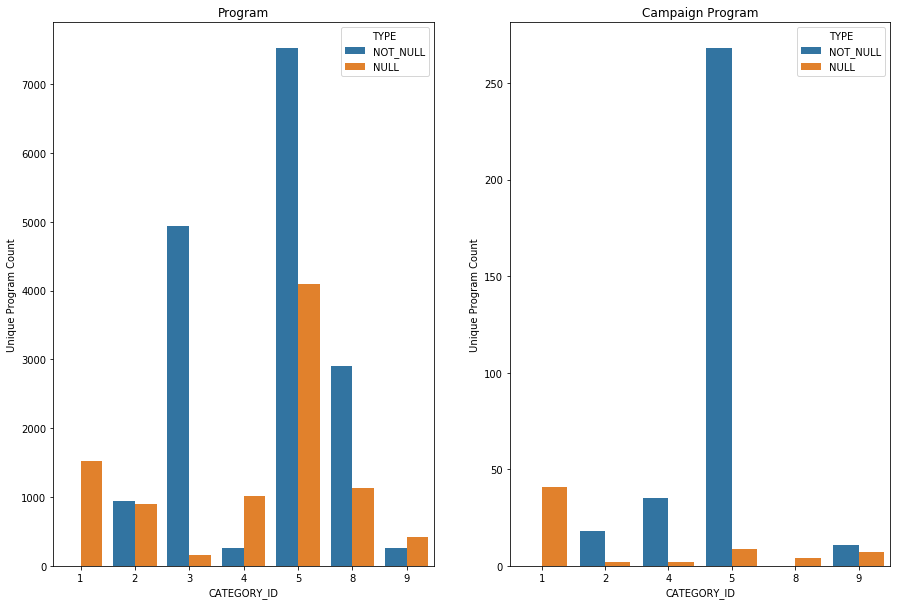

In [22]:
fig, ax = plt.subplots(ncols=2,figsize=(15,10))
fig1=sns.catplot(x="CATEGORY_ID", 
            y="COUNT", 
            hue="TYPE",
            kind = 'bar',
            data=program_and_progcampaign_df[program_and_progcampaign_df.SOURCE=='Program'],
            ax=ax[0]
           )
ax[0].set_title('Program')
ax[0].set_ylabel('Unique Program Count')
plt.close(fig1.fig)
fig2=sns.catplot(x="CATEGORY_ID", 
            y="COUNT", 
            hue="TYPE",
            kind = 'bar',
            data=program_and_progcampaign_df[program_and_progcampaign_df.SOURCE!='Program'],
            ax=ax[1]
           )
ax[1].set_title('Campaign Program')
ax[1].set_ylabel('Unique Program Count')
plt.close(fig2.fig)

Text(0.5,1,'Number of times the show is aired (All Program data) where PARENT_PROGRAM_ID = null')

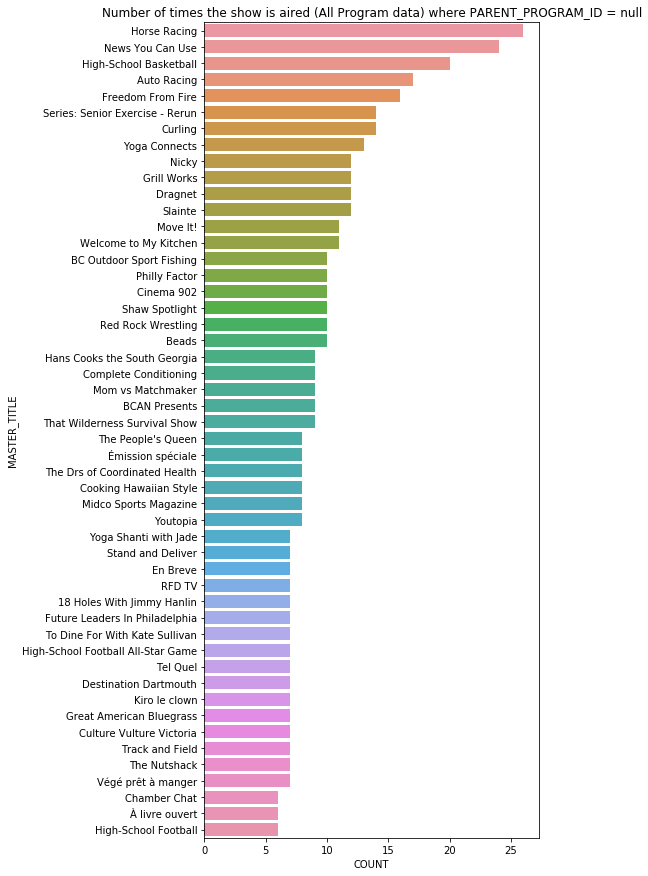

In [17]:
f, ax = plt.subplots(figsize=(6, 15))
barplot = sns.barplot(y="MASTER_TITLE", x="COUNT", data=program_pd[program_pd.PARENT_PROGRAM_ID.isnull()][0:50])
ax.set_title('Number of times the show is aired (All Program data) where PARENT_PROGRAM_ID = null')

PARENT_PROGRAM_ID     0
MASTER_TITLE         65
CATEGORY_ID          65
COUNT                65
MIN_DATE             65
MAX_DATE             65
dtype: int64

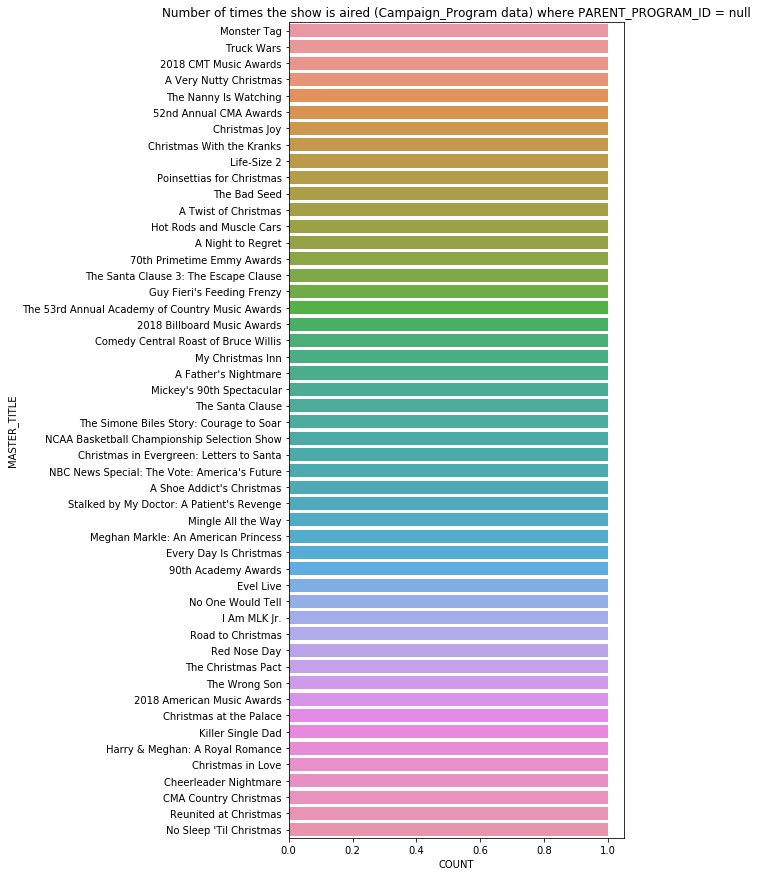

In [18]:
f, ax = plt.subplots(figsize=(6, 15))
barplot = sns.barplot(y="MASTER_TITLE", x="COUNT", data=campaign_program_pd[campaign_program_pd.PARENT_PROGRAM_ID.isnull()][0:50])
ax.set_title('Number of times the show is aired (Campaign_Program data) where PARENT_PROGRAM_ID = null')
campaign_program_pd[campaign_program_pd.PARENT_PROGRAM_ID.isnull()].count()

In [19]:
#sparkSession.stop()